

```
`# This is formatted as code`
```

https://drive.google.com/drive/u/0/folders/1q4iseizCdmC5Wx9G4KeNvcsH8SZrKF4b

<center> <b>Machine Learning - SBU FALL 2024</b></center>

In [10]:
Student_Number = '99243022'
Name = 'Masoume'
Last_Name = 'Pasebani'

# Imported Libraries

In [11]:
import torch
import torch.nn as nn               # For building neural network layers
import torch.optim as optim         # For optimizers (SGD, Adam, etc.)
import torch.nn.functional as F     # For activation functions and other operations
from torchvision import datasets, transforms  # For MNIST dataset and data preprocessing if its needed
from torch.utils.data import DataLoader       # For batching and shuffling data

# Additional libraries for visualization and analysis
import matplotlib.pyplot as plt     # For plotting graphs and visualizations
import numpy as np                  # For numerical operations
import seaborn as sns               # For plotting the confusion matrix heatmap
from sklearn.metrics import confusion_matrix  # For computing the confusion matrix

# Build a Model for the MNIST Dataset

In this Notebook, your goal is to build a machine learning model that achieves an accuracy of **98% or higher** on the MNIST dataset. The MNIST dataset contains images of handwritten digits (0-9), and it’s a popular benchmark for evaluating classification models. To achieve this accuracy threshold, you’ll need to carefully design, train, and evaluate your model.

## Objective

Using only the provided libraries, you will:
1. **Load and preprocess** the MNIST data.
2. **Build** a neural network model suitable for image classification.
3. **Train** the model on the training data, monitoring accuracy and adjusting parameters as needed.
4. **Evaluate** the model on the test data to ensure it meets the required accuracy threshold.

Each cell in this section will guide you through these steps, with descriptions explaining the purpose of each step and what you need to do. Follow the instructions carefully, and use your understanding of neural networks to achieve the best possible performance on the MNIST dataset.

## Step 1: Loading and Preprocessing the MNIST Dataset

In this cell, you will:
1. **Load the MNIST dataset**: This dataset consists of 28x28 grayscale images of handwritten digits (0–9). Each image is represented as a 28x28 array of pixel values, and each label corresponds to the digit in the image.
   
2. **Define key variables**:
   - `num_classes`: The number of unique classes in the dataset (0–9).
   - `input_shape`: The shape of each image, which will help in defining the model's input layer.
   - `num_features`: The total number of pixels in each image, useful if you need to flatten the images into a 1D vector for the model.

3. **Normalize the pixel values**: The pixel values are divided by 255 to rescale them from their original range of 0–255 to a range of 0–1. This normalization step helps the model converge faster and improves performance.

4. **One-hot encode the labels**: Convert the labels into a one-hot encoded format. Instead of representing the labels as single integers (e.g., `3` for the digit 3), one-hot encoding represents each label as a binary vector (e.g., `[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]` for the digit 3). This format is commonly used for multi-class classification problems and is required for training neural networks effectively.

By the end of this cell, your data will be ready for building and training the model.

In [12]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_train))
input_shape = x_train.shape[1:]
num_features = np.prod(input_shape)

# Normalize the pixel values and one-hot encode the labels
# TODO: Normalize pixel values to the range [0, 1]

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# TODO: Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

## Step 2: Building and Optimizing Your Model for MNIST

Your goal in this cell is to build a neural network model that achieves an accuracy of **98% or higher** on the MNIST dataset. To achieve this, you will need to:
1. **Define the model architecture**: You can experiment with the number of layers, units in each layer, and other architectural details to optimize your model’s performance.
2. **Choose an optimizer**: Test different optimizers (SGD, Adagrad, RMSprop, Adam) and fine-tune their hyperparameters (such as learning rate, momentum, etc.).
3. **Search for optimal hyperparameters**: You can use hyperparameter tuning methods such as **Hyperband**, **Random Search**, or **Bayesian Optimization** to find the best hyperparameter values efficiently.

### Available Tuning Options

- **Hyperband**: Efficiently finds the best hyperparameters by exploring a wide range and narrowing down based on performance.
- **Random Search**: Tries a random combination of hyperparameters within defined ranges.
- **Bayesian Optimization**: Uses a probabilistic approach to find the best parameters based on past evaluations.

### Final Task

Once you’ve achieved a model with over **98% accuracy** on the MNIST test set:
1. **Print the optimal hyperparameters** for your best-performing model.
2. **Build and compile the model** using these optimal parameters.
3. **Display the model summary** at the end of the cell.

By following this approach, you will gain insights into how different optimizers and model configurations impact performance, ultimately helping you build an effective and efficient model for the MNIST dataset.


### if you achieve the threshold before testing all the items above you must continue and interpert the result and the change effect!

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
from sklearn.model_selection import train_test_split

# Define model creation function with hyperparameters
def build_model(filters, filters_2, units, optimizer):
    model = models.Sequential([
        layers.Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(filters_2, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(units, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define search space (smaller to speed up training)
filter_options = [32, 64]
filter_2_options = [64]
unit_options = [64]
optimizer_options = ['adam']

x_train_sample, _, y_train_sample, _ = train_test_split(x_train, y_train, train_size=0.1, random_state=42)

# Store the best model and its parameters
best_model = None
best_accuracy = 0
best_params = {}

# EarlyStopping and ReduceLROnPlateau callbacks to optimize training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Perform a reduced grid search with early stopping and small data subset
for filters in filter_options:
    for filters_2 in filter_2_options:
        for units in unit_options:
            for optimizer_name in optimizer_options:
                if optimizer_name == 'adam':
                    optimizer = tf.keras.optimizers.Adam()

                # Build the model
                model = build_model(filters, filters_2, units, optimizer)

                history = model.fit(x_train_sample, y_train_sample, epochs=3, batch_size=32, verbose=0,
                    validation_data=(x_test, y_test), callbacks=[early_stop, learning_rate_reduction])


                _, accuracy = model.evaluate(x_test, y_test, verbose=0)

                # If this model is better, store it
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = model
                    best_params = {
                        'filters': filters,
                        'filters_2': filters_2,
                        'units': units,
                        'optimizer': optimizer_name
                    }

# Print the best hyperparameters and accuracy
print(f"Best accuracy: {best_accuracy * 100:.2f}%")
print(f"Best parameters: {best_params}")

Best accuracy: 97.06%
Best parameters: {'filters': 32, 'filters_2': 64, 'units': 64, 'optimizer': 'adam'}


## Step 3: Training, Evaluating, and Saving Your Model

In this part, you will:
1. **Train the Model**: Train your model on the MNIST training data for a specified number of epochs. The `fit` function will show the training and validation accuracy/loss at each epoch, allowing you to monitor the model’s progress.
   
2. **Make Predictions**: Once training is complete, generate predictions on the test data. While not required for accuracy calculation, this can be useful if you want to further analyze the model’s predictions.

3. **Evaluate the Model**: Use the `evaluate` function to calculate the model's loss and accuracy on the test set. This will give you an objective measure of the model’s performance. Remember, the goal is to achieve **98% or higher** accuracy.

4. **Save the Model**: After achieving satisfactory accuracy, save your model to disk for later use. This allows you to load the trained model in the future without retraining.

### Important Notes:
- **Training Parameters**: You can adjust the number of epochs or batch size in the `fit` function if needed to reach the required accuracy.
- **Model Storage**: The saved model file (`mnist_model.keras`) will store the entire model structure and weights, enabling you to load and use it later without needing to rebuild or retrain.

By completing these steps, you will have a fully trained and saved model capable of achieving high accuracy on the MNIST dataset.

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = build_model(filters=64, filters_2=128, units=128, optimizer='adam')

# Define early stopping and learning rate reduction callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop, learning_rate_reduction])

# Make predictions on the test set
predictions = model.predict(x_test)

# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy*100:.2f}%")

# Save the model to disk
model.save('mnist_model.keras')

model.summary()

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9028 - loss: 0.3124 - val_accuracy: 0.9853 - val_loss: 0.0464 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9873 - loss: 0.0430 - val_accuracy: 0.9896 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9912 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9923 - val_loss: 0.0272 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9961 - loss: 0.0123 - val_accuracy: 0.9875 - val_loss: 0.0396 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 0.9922 - val_loss: 0.0270 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9974 - loss: 0.0072 - 

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_118 (Conv2D)                  │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_118 (MaxPooling2D)     │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_119 (Conv2D)                  │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_119 (MaxPooling2D)     │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_59 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,456,544 (5.56 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 971,030 (3.70 MB)

## Step 4: Visualizing Model Performance

In this final step, you will visualize your model's performance using a series of plots. These visualizations will help you understand how well the model performed, identify areas for potential improvement, and interpret any misclassifications.

1. **Plot the Training History**: This plot shows the training and validation accuracy over each epoch. By examining this plot, you can see how the model's accuracy improved with each epoch and check if there’s any overfitting (e.g., if training accuracy is much higher than validation accuracy).

2. **Plot the Confusion Matrix**: The confusion matrix provides a detailed view of the model's performance across each digit class (0–9). Each cell in the matrix shows the number of true vs. predicted classifications for each class. This helps you identify specific digits that the model struggles to classify correctly, as they may have higher misclassification counts.

3. **Visualize Misclassified Images**: In this grid, you’ll see some of the images that were incorrectly classified by the model. Each image shows the true label and the predicted label. Examining these misclassified examples can give you insight into where the model might have difficulty, such as digits that look similar (e.g., 3 and 5). It can also help you decide if additional data processing or model adjustments are needed.

### Tips for Interpretation:
- **Training History**: If the validation accuracy plateaus early or diverges significantly from training accuracy, consider revisiting your model architecture or hyperparameters.
- **Confusion Matrix**: Look for off-diagonal cells with high values, as these indicate common misclassifications.
- **Misclassified Images**: Understanding these cases can guide you in tuning or improving your model, such as adding more data for challenging classes.

By analyzing these plots, you’ll gain a deeper understanding of your model’s strengths and weaknesses on the MNIST dataset.

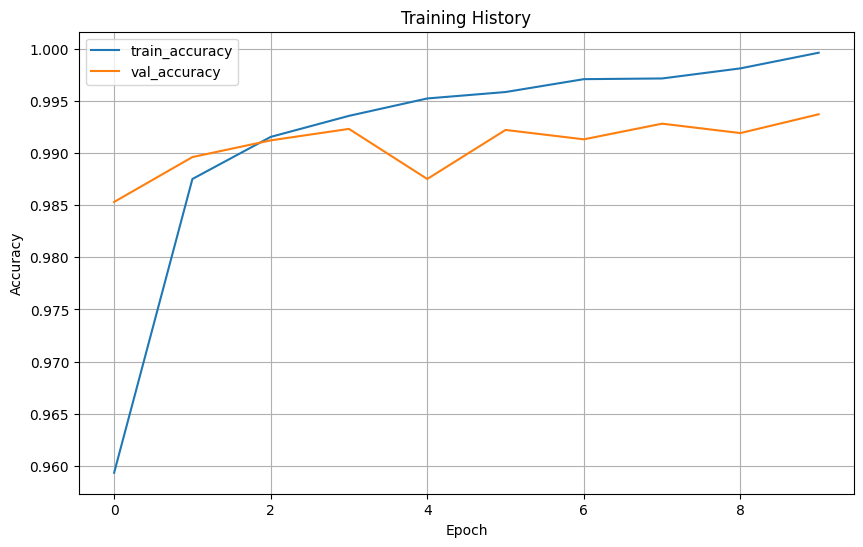

In [17]:
# Plot the training history

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.grid(True)
plt.show()

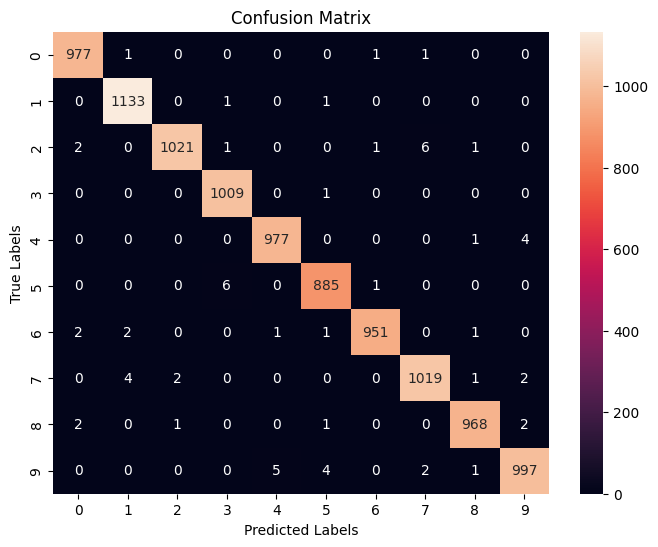

In [18]:
# Plot the confusion matrix heatmap
# TODO: Compute the confusion matrix using the true labels and predicted labels.
cm = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

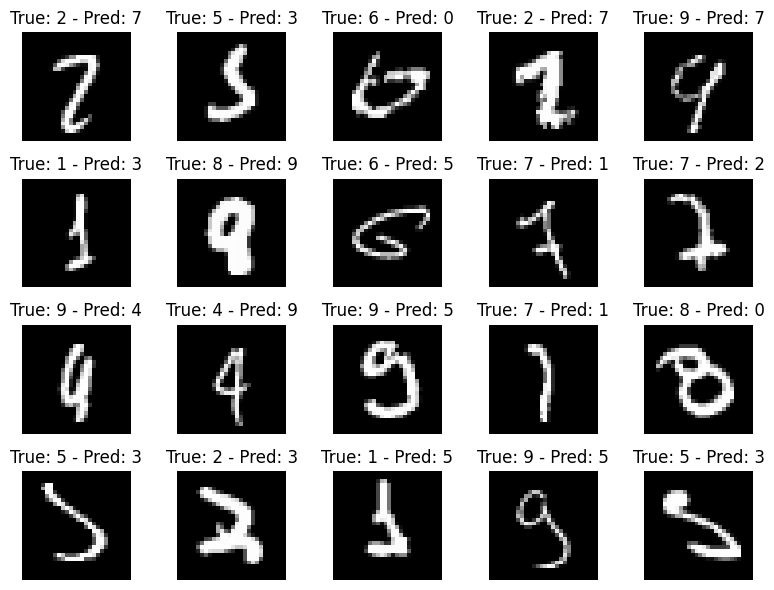

In [20]:
incorrect_indices = np.where(predicted_classes != np.argmax(y_test, axis=1))[0]

# Visualize the incorrectly classified images on a 4x5 grid
plt.figure(figsize=(8, 6))
for i, idx in enumerate(incorrect_indices[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[idx])} - Pred: {predicted_classes[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()